### Hypothesis testing

In [423]:
library("data.table") #loading the data
file_path <- "C:/Users/kamil/Downloads/diversity.csv"
data_diversity <- fread(file_path,
 stringsAsFactors = F,
 data.table = T)

head(data_diversity)

Projects,Shannon diversity index,Normalized Shannon/NH,Simpson's index,Normalized Simpson/NGV,Distance to target Simpson,Distance to target Shannon,Success
Bagel,1.459482,0.57,0.7377778,0.81,-0.2107210,-0.5621189,0
Bagel 2.0,1.270018,0.49,0.6530612,0.71,-0.3424903,-0.7133499,0
Blazer,1.236685,0.48,0.6805556,0.74,-0.3011051,-0.7339692,0
Boston,1.771016,0.69,0.8046875,0.88,-0.1278334,-0.3710637,1
Crypto,1.078992,0.42,0.6530612,0.71,-0.3424903,-0.8675006,0
Cupid,1.411304,0.55,0.7083333,0.77,-0.2613648,-0.5978370,0


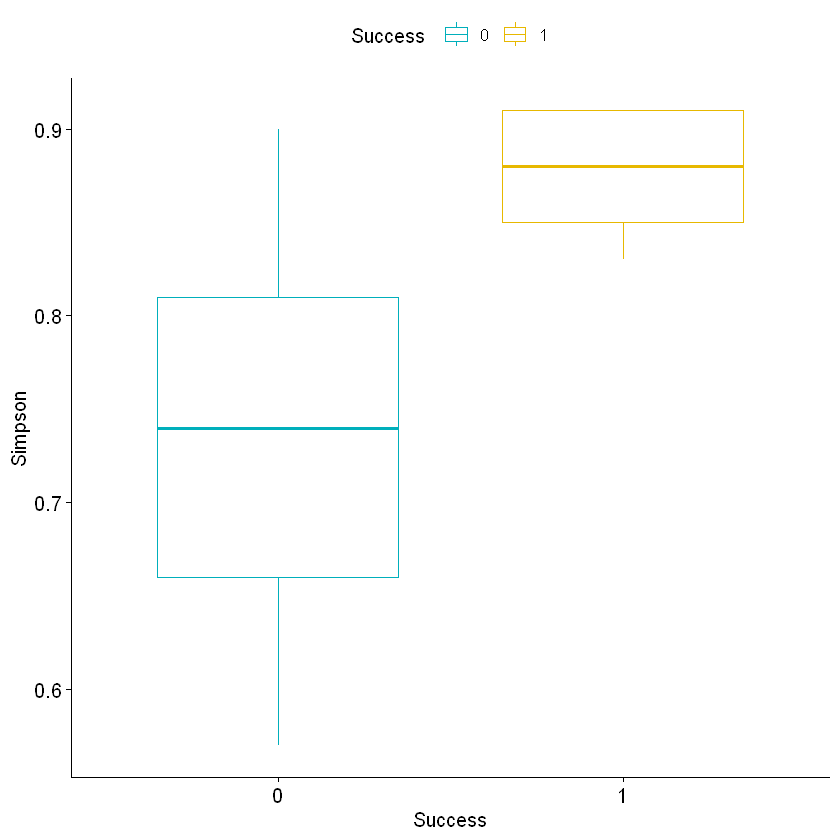

In [424]:
#install.packages("ggpubr") #box plots of NGV scores of successful and unsuccessful projects 
library("ggpubr")
ggboxplot(data_diversity, x = "Success", y = "Normalized Simpson/NGV", 
          color = "Success", palette = c("#00AFBB", "#E7B800"),
        ylab = "Simpson", xlab = "Success")

In [425]:
colnames(data_diversity)[5] <- "NGV" #changing the column name

In [426]:
library(dplyr) #means and standard deviations of successful and unsuccessful projects
group_by(data_diversity, Success) %>%
  summarise(
    count = n(),
    mean = mean(NGV, na.rm = TRUE),
    sd = sd(NGV, na.rm = TRUE)
  )

Success,count,mean,sd
0,25,0.7324,0.09841578
1,5,0.8760,0.03577709


In [427]:
res.ftest <- var.test(NGV ~ Success, data = data_diversity) #F-test
res.ftest


	F test to compare two variances

data:  NGV by Success
F = 7.5669, num df = 24, denom df = 4, p-value = 0.06188
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.8890894 25.5713630
sample estimates:
ratio of variances 
          7.566927 


The p-value of F-test is p = 0.06188. It’s greater than the significance level alpha = 0.05 so there is no significant difference between the variances of the two sets of data. The classic t-test witch assume equality of the two variances can be used.

In [400]:
success <- data_diversity$NGV[data_diversity$Success==1] #groups for hypothesis testing
no.success <- data_diversity$NGV[data_diversity$Success==0]

In [428]:
t.test(success, no.success, #hypothesis testing ('successful' cognitve diversity scores are greater than 'unsuccessful')
        var.equal = TRUE, alternative = "greater")


	Two Sample t-test

data:  success and no.success
t = 3.1822, df = 28, p-value = 0.001781
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.06683458        Inf
sample estimates:
mean of x mean of y 
   0.8760    0.7324 


### Regression

In [429]:
library("data.table") #loading data for regression with GV
file_path <- "C:/Users/kamil/Desktop/for_regression.csv"
regr <- fread(file_path,
 stringsAsFactors = F,
 data.table = T)

head(regr)

prop_infj,prop_infp,prop_intj,prop_isfj,prop_isfp,prop_esfp,prop_intp,prop_istp,prop_enfj,prop_enfp,prop_estj,prop_estp,prop_entj,prop_istj,prop_entp,prop_esfj,GV,GV_p,Success
0.1333,0.4000,0.2000,0.200,0.0667,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,0.7377778,73.77778,0
0.0000,0.2857,0.0714,0.000,0.0000,0.0714,0.5000,0.0714,0.0000,0.0000,0,0,0,0,0,0,0.6530612,65.30612,0
0.1667,0.3333,0.0833,0.000,0.0000,0.0000,0.4167,0.0000,0.0000,0.0000,0,0,0,0,0,0,0.6805556,68.05556,0
0.1875,0.0625,0.3125,0.125,0.0000,0.0000,0.0000,0.1875,0.0625,0.0625,0,0,0,0,0,0,0.8046875,80.46875,1
0.0000,0.2857,0.2857,0.000,0.0000,0.0000,0.4286,0.0000,0.0000,0.0000,0,0,0,0,0,0,0.6530612,65.30612,0
0.1250,0.4583,0.1250,0.000,0.0000,0.0000,0.2083,0.0833,0.0000,0.0000,0,0,0,0,0,0,0.7083333,70.83333,0


In [430]:
#install.packages("leaps")
library(leaps)
models <- regsubsets(Success ~ GV + 
                              prop_infj+ prop_infp+prop_intj+prop_isfj+prop_isfp+prop_esfp+prop_intp+prop_istp+prop_enfj+prop_enfp+prop_estj+prop_estp+prop_entj+prop_istj+prop_entp+prop_esfj, 
                            data = regr, nvmax = 18)

summary(models) #best subsets with GV scores

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"1  linear dependencies found"

Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(Success ~ GV + prop_infj + prop_infp + prop_intj + 
    prop_isfj + prop_isfp + prop_esfp + prop_intp + prop_istp + 
    prop_enfj + prop_enfp + prop_estj + prop_estp + prop_entj + 
    prop_istj + prop_entp + prop_esfj, data = regr, nvmax = 18)
17 Variables  (and intercept)
          Forced in Forced out
GV            FALSE      FALSE
prop_infj     FALSE      FALSE
prop_infp     FALSE      FALSE
prop_intj     FALSE      FALSE
prop_isfj     FALSE      FALSE
prop_isfp     FALSE      FALSE
prop_esfp     FALSE      FALSE
prop_intp     FALSE      FALSE
prop_istp     FALSE      FALSE
prop_enfj     FALSE      FALSE
prop_enfp     FALSE      FALSE
prop_estj     FALSE      FALSE
prop_entj     FALSE      FALSE
prop_istj     FALSE      FALSE
prop_entp     FALSE      FALSE
prop_esfj     FALSE      FALSE
prop_estp     FALSE      FALSE
1 subsets of each size up to 16
Selection Algorithm: exhaustive
          GV  prop_infj prop_infp prop_intj prop_isfj

In [431]:
res_sum <- summary(models) #best subset according to AdjR, CP and BIC
data.frame(
  Adj.R2 = which.max(res_sum$adjr2),
  CP = which.min(res_sum$cp),
  BIC = which.min(res_sum$bic)
) #the one with 4 independent variables

Adj.R2,CP,BIC
4,4,4


In [432]:
get_model_formula(4, models, "Success") #formula of the best model

Success ~ GV + prop_intj + prop_enfj + prop_istj
<environment: 0x0000000041a6b8f0>

In [433]:
library("data.table") #loading data for regression with Entropy
file_path <- "C:/Users/kamil/Desktop/for_regression2.csv"
regr2 <- fread(file_path,
 stringsAsFactors = F,
 data.table = T)

head(regr2)

prop_infj,prop_infp,prop_intj,prop_isfj,prop_isfp,prop_esfp,prop_intp,prop_istp,prop_enfj,prop_enfp,prop_estj,prop_estp,prop_entj,prop_istj,prop_entp,prop_esfj,Entropy,Success
0.1333,0.4000,0.2000,0.200,0.0667,0.0000,0.0000,0.0000,0.0000,0.0000,0,0,0,0,0,0,1.459482,0
0.0000,0.2857,0.0714,0.000,0.0000,0.0714,0.5000,0.0714,0.0000,0.0000,0,0,0,0,0,0,1.270018,0
0.1667,0.3333,0.0833,0.000,0.0000,0.0000,0.4167,0.0000,0.0000,0.0000,0,0,0,0,0,0,1.236685,0
0.1875,0.0625,0.3125,0.125,0.0000,0.0000,0.0000,0.1875,0.0625,0.0625,0,0,0,0,0,0,1.771016,1
0.0000,0.2857,0.2857,0.000,0.0000,0.0000,0.4286,0.0000,0.0000,0.0000,0,0,0,0,0,0,1.078992,0
0.1250,0.4583,0.1250,0.000,0.0000,0.0000,0.2083,0.0833,0.0000,0.0000,0,0,0,0,0,0,1.411304,0


In [434]:
library(leaps)
models2 <- regsubsets(Success ~ Entropy + 
                              prop_infj+ prop_infp+prop_intj+prop_isfj+prop_isfp+prop_esfp+prop_intp+prop_istp+prop_enfj+prop_enfp+prop_estj+prop_estp+prop_entj+prop_istj+prop_entp+prop_esfj, 
                            data = regr2, nvmax = 18)

summary(models2)  #best subsets wtih Entropy scores 

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"1  linear dependencies found"

Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(Success ~ Entropy + prop_infj + prop_infp + 
    prop_intj + prop_isfj + prop_isfp + prop_esfp + prop_intp + 
    prop_istp + prop_enfj + prop_enfp + prop_estj + prop_estp + 
    prop_entj + prop_istj + prop_entp + prop_esfj, data = regr2, 
    nvmax = 18)
17 Variables  (and intercept)
          Forced in Forced out
Entropy       FALSE      FALSE
prop_infj     FALSE      FALSE
prop_infp     FALSE      FALSE
prop_intj     FALSE      FALSE
prop_isfj     FALSE      FALSE
prop_isfp     FALSE      FALSE
prop_esfp     FALSE      FALSE
prop_intp     FALSE      FALSE
prop_istp     FALSE      FALSE
prop_enfj     FALSE      FALSE
prop_enfp     FALSE      FALSE
prop_estj     FALSE      FALSE
prop_entj     FALSE      FALSE
prop_istj     FALSE      FALSE
prop_entp     FALSE      FALSE
prop_esfj     FALSE      FALSE
prop_estp     FALSE      FALSE
1 subsets of each size up to 16
Selection Algorithm: exhaustive
          Entropy prop_infj prop_infp prop

In [435]:
res_sum2 <- summary(models2) #best subset according to AdjR, CP and BIC
data.frame(
  Adj.R2 = which.max(res_sum2$adjr2),
  CP = which.min(res_sum2$cp),
  BIC = which.min(res_sum2$bic)
) 

Adj.R2,CP,BIC
6,1,1


In [436]:
get_model_formula(1, models2, "Success") #formula of the best model accorrding to CP and BIC 

Success ~ Entropy
<environment: 0x000000006be686d0>

In [437]:
logit_3 <- glm(Success ~ Entropy, data = regr2, family=binomial) #Entropy as the only predictor
summary(logit_3)


Call:
glm(formula = Success ~ Entropy, family = binomial, data = regr2)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.54268  -0.36674  -0.19347  -0.09975   1.72964  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -12.234      4.890  -2.502   0.0124 *
Entropy        6.732      2.858   2.356   0.0185 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.034  on 29  degrees of freedom
Residual deviance: 16.669  on 28  degrees of freedom
AIC: 20.669

Number of Fisher Scoring iterations: 6


In [438]:
logit_4 <- glm(Success ~ GV_p, data = regr, family=binomial) #GV as the only predictor
summary(logit_4)


Call:
glm(formula = Success ~ GV_p, family = binomial, data = regr)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.35378  -0.37560  -0.10361  -0.03177   1.89307  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -25.2354    11.8027  -2.138   0.0325 *
GV_p          0.3127     0.1496   2.090   0.0366 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.034  on 29  degrees of freedom
Residual deviance: 15.920  on 28  degrees of freedom
AIC: 19.92

Number of Fisher Scoring iterations: 7
